# Urban Heat Island (UHI)-Effekt <br> (constellr - LST30)

**Autor*in:** Julian Hausmann
**Copyright:** © 2025 Urbetho CF GmbH
**Lizenz:** Dieses Notebook steht unter der [CC BY-NC-SA 4.0 License](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.en).

<div style="text-align: right"><i> Fortgeschritten </i></div>

Constellr liefert kontinuierlich globale Erdoberflächentemperatur (LST). Bisher werden die Daten aus verschiedenen Quellen fusioniert und ihre Qualität durch selbstentwickelte Algorithmen verbessert. Sie werden als LST30 Produkt vertrieben und besitzen eine räumliche Auflösung von 30m, die im Vergleich zu anderen LST-Datenprodukten sehr hoch ist. Die Daten liegen auf EO-LAB für den Zeitraum 2022 bis 2025 für die Stadt Freiburg im Breisgau vor. Weitere nationale und globale Daten können angefragt werden. Ab 2025 wird von constellr die HiVE-Konstellation durch die ersten Satelliten gestartet. Hierbei werden weiteren Verbesserungen in der Qualität und Genauigkeit der LST-Daten gemacht und zusätzliche, noch höher auflösende Datenprodukte angeboten.

Die LST-Daten werden in diesem Notebook genutzt, um den Urban Heat Island (UHI)-Effekt beispielhaft für die Stadt Freiburg im Breisgau darzustellen. Der UHI-Effekt stellt einen Zusammenhang zwischen erhöhter Temperatur und menschlicher Aktivität und Infrastruktur dar. Gerade in Städten wird sich dieser Effekt durch den Klimawandel verstärken. Es erfordert präzise Information über die Temperatur, um zielgerichtete Planung durchzuführen und die Temperaturen wieder zu reduzieren.   

In diesem Notebook stellen wir Zugriff zu den bisherigen fusionierten Datensätzen her. Der Zugriff ist nur über eine **Virtuelle Maschine (VM)** möglich. Wie Sie den Zugang zu einer VM erhalten lesen Sie im [**EO-LAB Portfolio**](https://eo-lab.org/de/portfolio/) unter dem Eintrag Virtuelle Maschinen. Der Zugang beschleunigt die Arbeit mit den Daten, da langwierige Downloads wegfallen.  

**General Note 1**: Ausführung der Zellen durch pressen des <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button vom top MENU (oder `Shift` + `Enter`).

**General Note 2**: Falls der Kern nich mehr arbeitet, im the top MENU, klicke <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Dann, im top MENU, klicken Sie "Run" und wählen Sie "Run All Above Selected Cell".

**General Note 3**: Schauen Sie sich im [**FORUM**](https://forum.code-de.org/de/) um oder Kontaktieren Sie den Support! 
<br>

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20240626163319/Urban-heat-island-effect-copy.webp">

*Diese Abbildung stellt den Urban Heat (UHI)-Effekt exemplarisch über einen Querschnitt der Temperaturen einer Stadt dar. Während die City extrem hohe Temperaturen aufweist, sind die ländlichen Gebiete um die Stadt herum weniger von Hitze betroffen. Die Abbildung gehört GeeksforGeeks und kann [hier](https://www.geeksforgeeks.org/urban-heat-island-effect/) abgerufen werden.*

#### 1. Installieren der benötigten Bibliotheken

Verschiedene Pakete müssen installiert werden, bevor Zugriff und Analyse der Daten gestartet werden können. Die Liste der zu installierenden Bibliotheken ist abhängig von den bereits lokal installierten Bibliotheken und muss dementsprechend erweitert werden, falls Bedarf besteht.

In [ ]:
!pip install rasterio numpy matplotlib

#### 2. Importieren der benötigten Bibliotheken

Viele der unten genannten Bibliotheken mussten nicht installiert werden, weil sie entweder bereits installiert wurden oder zu einer generellen Installation von Python zugehörig sind. Ohne die Bibliotheken ist das folgende Skript nicht ausführbar.  

In [1]:
# Import der Pakete
try:
    import rasterio
    import os
    import numpy as np
    from rasterio.warp import transform_bounds
    from rasterio.windows import from_bounds
    import matplotlib.pyplot as plt
    import json
    from affine import Affine

    # Ausgabe
    print("Erfolgreicher Import aller benötigter Pakete.")
except:

    # Ausgabe
    print("Nicht alle benötigten Pakete konnten erfolgreich importiert werden.")

Erfolgreicher Import aller benötigter Pakete.


#### 3. Suchen einer passenden LST30 Szene

Um eine passende Szene zu finden, nutzen wir die `os` Bibliothek und durchsuchen damit das Dateiensystem unserer VM. 

Wichtig ist hierbei, dass wir das Verzeichnis mit den Thermaldaten in unserer VM gemountet haben. Hierbei ist eine Nutzeranfrage notwendig - Informationen dazu finden Sie im [EO-LAB Portfolio](https://eo-lab.org/de/portfolio/?id=537851c8-7592-4a12-b392-d52b08b32563). Das Mounten von Daten wird im folgenden [Knowledge Base](https://knowledgebase.eo-lab.org/en/latest/eodata/How-to-mount-eodata-using-S3FS-in-Linux-on-EO-Lab.html) Artikel beschrieben. Da es sich in dem Knowledge Base Artikel um das Mounten von EODATA handelt, müssen beim Mounten von constellr Daten andere Credentials und ein anderer Zusatz zum fstab file genutzt werden. Sie erhalten diese nach Ihrer Anfrage vom Support Team. 

Der Genehmigungsablauf findet folgendermaßen statt:

<ol> 
<li>Füllen Sie dieses <a href="https://survey.hifis.dkfz.de/555711?lang=de-easy" target="_blank">Online-Formular</a> aus, um Ihr Projekt zu beschreiben; es ist erforderlich, um Ihren Antrag zu prüfen.</li> 
<li>Laden Sie das Formular herunter und speichern Sie es als PDF auf Ihrem Computer.</li> 
<li>Gehen Sie zum <a href="https://tenant-manager.eo-lab.org/panel/profile/personal" target="_blank">EO-Lab Tenant Manager</a>, melden Sie sich an.</li> 
<li>Stellen Sie sicher, dass Ihr Benutzerprofil einer „Organisation“ zugeordnet ist. Um dies zu überprüfen, navigieren Sie zu „Konfiguration“ und „Organisation“. <strong>WICHTIG:</strong> Bevor Sie eine neue Organisation anlegen, prüfen Sie bitte, ob für Ihren Arbeitgeber oder Ihr Projekt bereits eine Organisation angelegt wurde. Bitte wenden Sie sich an den Administrator / Projektverantwortlichen Ihres EO-Lab. Im Zweifelsfall senden Sie uns dazu bitte vorab eine Support-Anfrage!</li> 
<li>Nach der Zuweisung (oder Erstellung) einer Organisation erscheint im Menü links unter „Support“ ein neuer Punkt „Datenanfrage“. Erstellen Sie eine „Datenanfrage“ (im Menü auf der linken Seite) für das „EO-Lab Thermaldaten Archiv“. Fügen Sie das in Schritt 2 heruntergeladene Formular-PDF bei und reichen Sie Ihren Antrag ein. Sie werden nach der Auswertung benachrichtigt.</li> 
</ol>

In [19]:
# Pfad zu dem Verzeichnis, das die Bilder enthält
path = "/thermal-data-constellr" #passen Sie diesen Pfad ggf. auf den Namen an, den Sie für den mount verwendet haben

# Auflisten aller Dateien im angegebenen Verzeichnis
files = os.listdir(path)

# Durchlaufen der ersten fünf Dateien in der Liste
for f in files:
    # Ausgabe des Dateinamens
    print(f)

LST30
LSTprecision


In [20]:
# Pfad zu dem Verzeichnis, das die Bilder enthält
path = path + "/LST30/" #passen Sie diesen Pfad ggf. auf den Namen an, den Sie für den mount verwendet haben

# Auflisten aller Dateien im angegebenen Verzeichnis
files = os.listdir(path)

# Durchlaufen der ersten fünf Dateien in der Liste
for f in files:
    # Ausgabe des Dateinamens
    print(f)

Freiburg


Es sind verschiedene Datensätze verfügbar - weitere Informationen dazu erhalten Sie im Portfolio Artikel auf der EO-Lab website. Wir verwenden hier den Datensatz von Freiburg. 

In [21]:
# Pfad zu dem Verzeichnis, das die Bilder enthält
first_sub_path = path + "/Freiburg"

# Auflisten aller Dateien im angegebenen Verzeichnis
files = os.listdir(first_sub_path)

# Durchlaufen der ersten fünf Dateien in der Liste
for f in files:
    # Ausgabe des Dateinamens
    print(f)

20220213T102246
20220309T102219
20220310T101629
20220325T102214
20220326T101617
20220418T102207
20220520T102237
20220613T102217
20220715T102229
20220716T101644
20220724T101628
20220808T102310
20220809T101639
20220816T102253
20220825T101644
20221027T102255
20230208T102248
20230209T101651
20230405T102223
20230531T102209
20230624T102147
20230625T101549
20230711T101605
20230811T102208
20230820T101628
20230904T102215
20230905T101628
20230920T102245
20230929T101631
20240510T101606
20240720T102144
20240729T101558
20240806T101603
20240822T101616
20240829T102202
20250113T101636Z
20250221T102213Z
20250302T101621Z
20250309T102208Z
20250318T101613Z
20250402T102205Z
20250403T101610Z
20250410T102152Z
20250411T101623Z
20250613T102154Z
20250613T102217Z
20250621T102220Z
20250622T101612Z
20250629T102202Z
20250629T102226Z
20250630T101613Z


Die höchste Temperatur wurde in Freiburg im Breisgau in 2024 am 24. August gemessen. Informationen zu historischen Klimadaten sind entweder direkt beim [Deutschen Wetterdienst](https://www.dwd.de/DE/leistungen/cdc/cdc_ueberblick-klimadaten.html) oder indirekt über andere Dienstleister zu erhalten. 

Die Namensgebung der Daten folgt dem Prinzip yyyymmdd. Leider liegt für den 24. August keine Szene von constellr vor. Wir gehen davon aus, das das Wetter über mehrere Tage sehr heiß war und der 22. August ebenso gut genutzt werden kann, um den UHI-Effekt für Freiburg im Breisgau darzustellen. 

In [22]:
# Pfad zu dem Verzeichnis, das die Bilder enthält
thrid_sub_path = first_sub_path + "/20240822T101616"

# Auflisten aller Dateien im angegebenen Verzeichnis
files = os.listdir(thrid_sub_path)

# Durchlaufen der ersten fünf Dateien in der Liste
for f in files:
    # Ausgabe des Dateinamens
    print(f)

20240822T101616_CLOUDS.tiff
20240822T101616_LST30.tiff
20240822T101616_metadata.json
20240822T101616_thumbnail_cloud.jpg
20240822T101616_thumbnail_lst.jpg
20240822T101616_thumbnail_rgb.jpg


Nun können wir sehen, welche Datei die LST30 anzeigt. Außerdem gibt es noch eine Datei mit den Metadaten unserer Szene. Über die [Metadaten Konventionen](https://constellr.github.io/product-lst/product-deliverables/) von constellr Wissen wir, welche verschiedenen Informationen wir uns anschauen können und was sie bedeuten. Für uns wäre zum Beispiel spannend, wie stark die Wolkenbedeckung und die maximale und durchschnittle LST der Szene war.

Für ein besseres Verständnis wandeln wir die Daten von Grad Kelvin in Celsius um.

In [23]:
# JSON-Datei laden
with open(thrid_sub_path + '/20240822T101616_metadata.json', 'r', encoding='utf-8') as file:
    daten = json.load(file)
    
# Ausgabe ausgewählter Metadaten 
print("Aufnahmedatum: ", daten["scene_datetime"])
print("Wolkenbedeckung:", daten["cloud_ratio_aoi"])
print("Maximale LST (°C):", daten["max_lst"] - 273.15)
print("Median LST (°C):", daten["median_lst"] - 273.15)

Aufnahmedatum:  2024-08-22T10:16:16+00:00
Wolkenbedeckung: 0.0
Maximale LST (°C): 42.39000000000004
Median LST (°C): 22.74000000000001


#### 4. Öffnen der LST30 Szene

Nun öffnen und lesen wir die Szene. Wir wandeln die LST auch hier von Grad Kelvin in Celsius um. Außerdem definieren wir die geographische Begrenzung für die spätere Visualisierung. Diese soll nämlich direkt beim öffnen nur Daten zu dem Bereich enthalten, der auch von der LST30 abgedeckt wird.  

In [25]:
with rasterio.open(thrid_sub_path + "/20240822T101616_LST30.tiff") as src:
    
    # Lesen des Rasterbildes
    lst = src.read(1)
    
    # Umrechnung von Grad Kelvin in Celsius
    lst = lst - 273.15
    
    # Abrufen der Bounding Box
    bounds = src.bounds
    
    # Speichern der Begrenzung
    left, bottom, right, top = bounds
    
    # Berechnung der Transformation
    transform = src.transform

#### 5. Erstellen eines Histogram

Um einen Überblick über die Temperaturverteilung (LST) in der Szene zu gewinnen, betrachten wir das zugehörige Histogramm. Dabei fällt auf, dass der Median der Verteilung bei etwa 22,74 °C liegt. Die Standardabweichung scheint relativ hoch zu sein, da viele Werte deutlich vom Median abweichen, insbesondere in Richtung höherer Temperaturen. Dies deutet darauf hin, dass in der Szene verschiedene Landbedeckungstypen mit stark unterschiedlichen thermischen Eigenschaften vertreten sind.

In einer Szene mit überwiegend natürlicher Landbedeckung wäre eine annähernd normalverteilte Temperaturverteilung zu erwarten. Das vorliegende Histogramm zeigt jedoch eine deutliche Asymmetrie und eine Ausprägung höherer Temperaturen, was auf eine starke Prägung durch urbane Strukturen wie die Stadt Freiburg im Breisgau und umliegende Siedlungen hindeutet. Versiegelte Flächen in Städten speichern Wärme und führen zu erhöhten Temperaturen, wodurch die Verteilung verzerrt wird. Die Temperaturwerte oberhalb des Medians sind entsprechend überrepräsentiert, was sich im Histogramm durch eine ausgeprägte Schiefe und Unregelmäßigkeiten zeigt.

Text(0, 0.5, 'Frequenz')

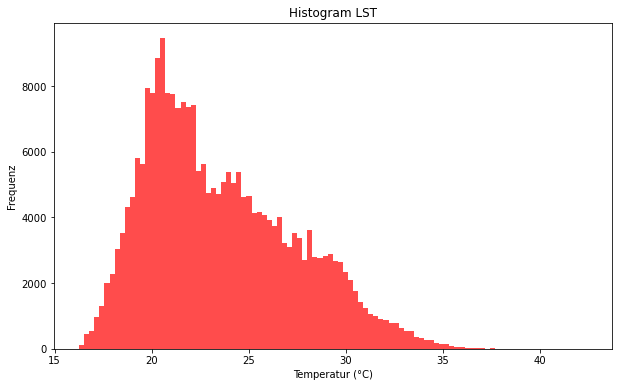

In [26]:
# Erstellen eines Plot
plt.figure(figsize=(10, 6))

# Erstellen des Subplot für das VV Band
plt.subplot(1, 1, 1)
plt.hist(lst.flatten(), bins=100, range=(lst.min(),lst.max()), color='red', alpha=0.7)
plt.title('Histogram LST')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Frequenz')

#### 6. Berechnen deskriptiver Kennwerte

Um einen UHI-Effekt nachzuweisen, versuchen wir räumlich differenzierte LST für die Szene zu finden. Wir wissen bereits, dass die Werte, die vom Median in Richtung höherer Temperaturen abweichen urbane Flächen darstellen. Außerdem ist es wahrscheinlich, dass sich die LST einer Normalverteilung annähern würde, wenn es keine Landnutzung geben würde. Diese Normalverteilung hat ihr Minimum bei ca. 17 °C und ihr Maximum bei geschätzt 23 °C mit jeweils +/- 3 °C zum Median. Wenn der urbane Raum ebenfalls eine Verteilung darstellen würde, würde das Minimum bei geschätzt 20 °C liegen. Ein Schnittpunkt beider Verteilungen könnte dann bei 22 °C liegen. Werte oberhalb dieses Schnittpunktes würden wahrscheinlich urban und Werte unterhalb ländlich sein. Auch wenn die Definition des Schwellenwert bzw. Schnittpunkt nicht genau berechnet wurden, können wir in der Theorie unsere weiteren Überlegungen darauf basieren. Anschließend berechnen wir dann für die urbanen und ländlichen Flächen sowie die Gesamtfläche den Median und die Standardabweichung.

In [14]:
# Maskierung (Beispiel: Annahme, dass Werte über 25°C als urban betrachtet werden)
threshold = 22

urban_mask = lst > threshold
country_mask = lst <= threshold

# Berechnung der Mittelwerte und der Standardabweichungen
urban_median = np.median(lst[urban_mask])
urban_std = np.std(lst[urban_mask])

country_median = np.median(lst[country_mask])
country_std = np.std(lst[country_mask])

gesamt_median = np.median(lst)
gesamt_std = np.std(lst)

#### 7. Visualisieren einer Karte der Erdoberflächentemperatur

Zusätzlich mit der Visualisierung der LST geben wir auch die Mediane und die Standardabweichungen aus. Es zeigt sich, dass innerhalb der ländlichen Werte eine geringere Abweichung verglichen zu den urbanen Werten liegt. Letztere haben sich im Histogram als sehr heterogen gekennzeichnet. Eine weitere Differenzierung in wenig und stark versiegelt könnte hier eventuell hilfreich sein. 

Trotzdem können wir einen deutlichen UHI-Effekt sehen, bei dem sich die Temperaturwerte deutlich zwischen Stadt und Land unterscheiden.

Auf der Karte zeigen wir außerdem noch eine Linie bei `y = 531600` an. Diesen Wert wollen wir im folgenden benutzen, um ein Temperaturprofil anzuzeigen. Dadurch lässt sich dann auch der UHI-Effekt noch auf andere Art darstellen.

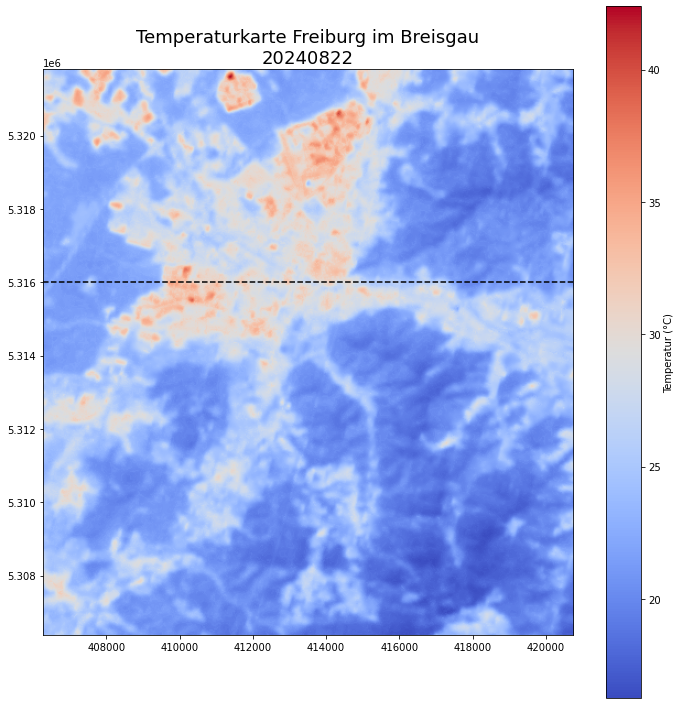

Median der gesamten Temperaturen: 22.74 °C
Standardabweichung der gesamten Temperaturen: 3.83 °C

Median der urbanen Temperaturen: 25.62 °C
Standardabweichung der urbanen Temperaturen: 2.99 °C

Median der ländlichen Temperaturen: 20.25 °C
Standardabweichung der ländlichen Temperaturen: 1.22 °C


In [15]:
# Erstellen des Plot
fig, ax = plt.subplots(figsize=(10, 10))

# Einfügen des Rasterbildes
img = ax.imshow(lst, cmap="coolwarm", extent=[left, right, bottom, top])

# Einfügen zusätzlicher Elemente
cbar = fig.colorbar(img)
cbar.set_label('Temperatur (°C)')

# Titel des Plots
ax.set_title(f"Temperaturkarte Freiburg im Breisgau\n{thrid_sub_path[-15:-7]}", size=18)
ax.axhline(y=5316000.0, color='black', linestyle='--', linewidth=1.5, label='y = 200')

# Zeigen des Plot
plt.tight_layout()
plt.show()

# Ausgabe
print(f"Median der gesamten Temperaturen: {gesamt_median:.2f} °C")
print(f"Standardabweichung der gesamten Temperaturen: {gesamt_std:.2f} °C")
print()
print(f"Median der urbanen Temperaturen: {urban_median:.2f} °C")
print(f"Standardabweichung der urbanen Temperaturen: {urban_std:.2f} °C")
print()
print(f"Median der ländlichen Temperaturen: {country_median:.2f} °C")
print(f"Standardabweichung der ländlichen Temperaturen: {country_std:.2f} °C")

#### 8. Berechnen eines Temperaturprofils

Für die Berechnung des Temperaturprofils müssen wir `y = 531600` in eine Pixelzeile übersetzen. Dafür verwenden wir die `affine` Bibliothek und erstellen eine Transformation. Sobald wir die Zeilennummer haben, extrahieren wir alle x-Werte. Die x-Koordinaten rechnen wir auch mit der Transformation, jedoch in die andere Richtung um, um realen Weltkoordinaten (Meter im UTM-System) zu erhalten.  

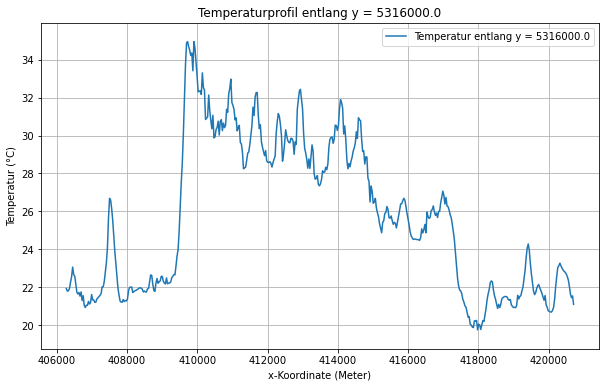

In [16]:
# Affine Transformationsparameter
pixel_width = 30.0
pixel_height = 30.0

transform = Affine.translation(left, top) * Affine.scale(pixel_width, -pixel_height)

# Y-Koordinate (Welt) → Pixelzeile
y_index = 5316000.0
row = int((y_index - transform.f) / transform.e)

# Querschnittsdaten
temperature_cross_section = lst[row, :]
x_coords = transform.c + np.arange(lst.shape[1]) * transform.a  # x-Koordinaten

# Y-Achse begrenzen (manuell oder automatisch)
y_start = temperature_cross_section.min() - 1
y_end = temperature_cross_section.max() + 1

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_coords, temperature_cross_section, label=f'Temperatur entlang y = {y_index:.1f}')
plt.title(f'Temperaturprofil entlang y = {y_index:.1f}')
plt.xlabel('x-Koordinate (Meter)')
plt.ylabel('Temperatur (°C)')
plt.ylim(y_start, y_end)
plt.grid(True)
plt.legend()
plt.show()

#### 9. Glättung des Temperaturprofil

Das Temperaturprofil ist sehr detailiert. Für uns sind die vielen lokalen Maxima und Minima nicht entscheident. Wir wollen den UHI-Effekt auf einer gröberen Skala verdeutlichen und glätten deshalb über jeweils 40 Pixelwerte des Profils. Dafür nutzen wir die `np` Bibliothek und eine Funktion für eine Glättung auf Basis des Mittelwerts.

Für die y-Werte zu Beginn und Ende der x-Achse kann kein Durchschnittswert erstellt werden, da entweder in positive oder negative Richtung keine y-Werte vorhanden sind. Das geglättete Temperaturprofil enthält deswegen an diesen Stellen keine Werte. Dadurch stimmt es nicht mehr mit den x-Koordinaten überein. Die x-Koordinaten müssen deswegen zu Beginn und Ende des Wertebereichs gekürzt werden. Bei einem geraden Fenster können wir zu Beginn und Ende gleich viele Werte entfernen. Bei einem ungeraden Fenster besteht ein Unterschied.

Durch das Temperaturprofil können wir auch sehr eindeutig den UHI-Effekt erkennen. Durch das Hinzufügen einer Linie, die die Durchschnittstemperatur der Szene zeigt, lässt sich erkennen, das niedrige und hohe Koordinaten unterdurchschnittliche Temperaturen aufweisen und mittelgroße Koordinaten überdurchschnittliche Temperaturen. An den Rändern befindet sich synchron dazu der ländliche Raum und in der Mitte die Stadt Freiburg im Breisgau.

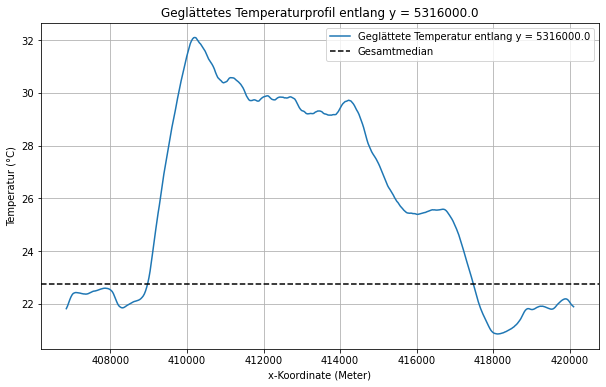

In [17]:
# Glättung mit gleitendem Durchschnitt
window_size = 40
smoothed_data = np.convolve(temperature_cross_section, np.ones(window_size)/window_size, mode='valid')

# Gekürzte x-Achse anpassen
crop = window_size - 1
x_coords_smoothed = x_coords[crop//2 : -crop//2]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_coords_smoothed, smoothed_data, label=f'Geglättete Temperatur entlang y = {y_index:.1f}')
plt.axhline(y=gesamt_median, color='black', linestyle='--', linewidth=1.5, label='Gesamtmedian')
plt.title(f'Geglättetes Temperaturprofil entlang y = {y_index:.1f}')
plt.xlabel('x-Koordinate (Meter)')
plt.ylabel('Temperatur (°C)')
plt.grid(True)
plt.legend()
plt.show()